# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load
from sklearn.inspection import permutation_importance

sns.set(style="whitegrid")  # set style to 'whitegrid' for modern aesthetics

In [2]:
random_forest = load('../models/random_forest.joblib')
X_test = np.load('../data/X_test_all_indices.npy')
y_test = np.load('../data/y_test.npy')

# Compute Feature Importances

**Source**: *https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html*

In [3]:
importances = random_forest.feature_importances_
forest_importances = pd.Series(importances, index=range(22))
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)

result = permutation_importance(random_forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
forest_importances_permutation = pd.Series(result.importances_mean, index=range(22))

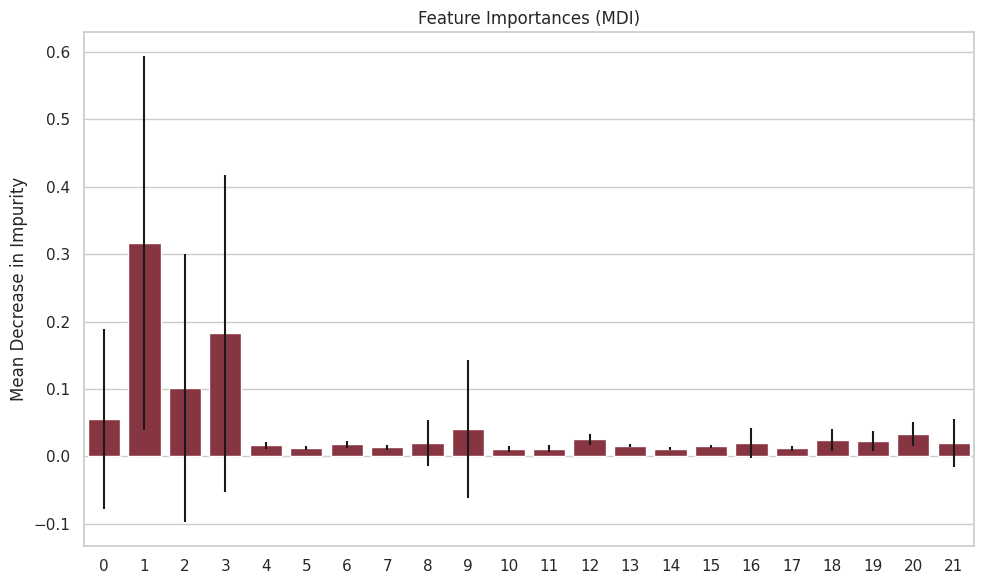

In [4]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.barplot(x=forest_importances.index, y=forest_importances, yerr=std, ax=axs, color="#942738")
axs.set_title("Feature Importances (MDI)")
axs.set_ylabel("Mean Decrease in Impurity")
fig.tight_layout()
plt.show()

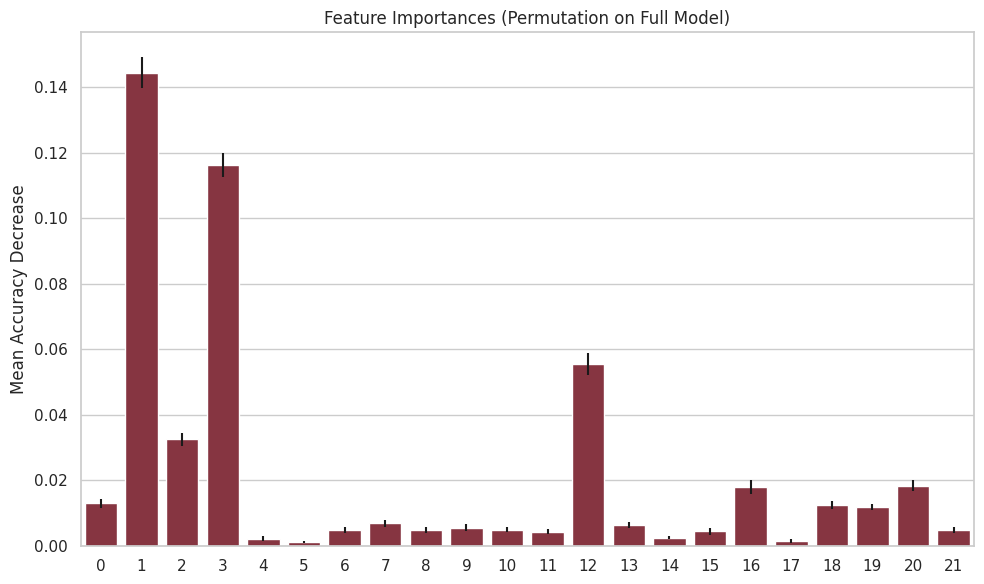

In [5]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.barplot(x=forest_importances_permutation.index, y=forest_importances_permutation, yerr=result.importances_std, ax=axs, color="#942738")
axs.set_title("Feature Importances (Permutation on Full Model)")
axs.set_ylabel("Mean Accuracy Decrease")
fig.tight_layout()
plt.savefig(f'FeatureImportances_Permutation.png', bbox_inches='tight')
plt.show()

## Analysis

- Both methods agree that band *B3* (Green) (index `1`) is - not surprisingly - most important
- Also *B5* (Visible and Near Infrared with a central wavelength of 705 nm; index `3`) and *B4* (Red; index `2`) are important
- Further, permutation-based importance is high for the *Green Normalized Difference Vegetation Index (GNDVI)* (index `12`), *Red edge Ratio Index 1 (RRI1)* (index `16`), *Normalized Burn Ratio (NBR)* (index `20`), *Normalized Difference Infrared Index (NDII)* (index `19`) and *Moisture Stress Index (MSI)* (index `18`)
- Those **eight features** were used to form a third training dataset `X_train_selected_indices` (apart from `X_train` and `X_train_all_indices`).